# PHREEQC Bacteria Model Plotting
This notebook will plot your PHREEQC results along with your data. The model has already been copied to this folder from week 7 and renamed `bact_selectedoutput.sel`.

## Start this notebook by specifying the data you would like to plot.
* Replace `df_example.csv` with the filename of your adsorption data

In [7]:
# Data filename
data_set = 'bacteria_data1.csv'

## Model and data import

In [8]:
# import the pandas module to store data in a dataframe
import pandas as pd
# Model filename already specified
model_selected_output = 'exp1_output_1.sel'
# Load the data set
df1 = pd.read_csv(data_set)
# This will automatically remove data that is below pH 4.5 or above pH9.5
df2 = df1[(df1['pH'] >= 4.5) & (df1['pH'] <= 9.5)][['pH', 'sampconc']]
# This will sort the data in ascending order based on pH
df2.sort_values("pH", inplace=True)
# This will calculate Zn adsorption as a percentage of the total Zn concentration
df2['Znadsper'] = (1 - (df2['sampconc'] / 5)) * 100
# This will replace negative values of Znadsper with 0
df2['Znadsper'] = df2['Znadsper'].clip(lower=0)
# This will replace Znadsper values greater than 100 with 100
df2['Znadsper'] = df2['Znadsper'].clip(upper=100)

# load the selected output into a dataframe and specify that the data are separated by tabs
mod = pd.read_csv(model_selected_output, sep="\t")
# get rid of the first row data (see comment above about why)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

## Double check that the selected output looks correct

In [9]:
mod

,pH,m_BactaOZn+,m_BactbOZn+,m_BactcOZn+,Unnamed: 4
3,4.5,2.199100e-05,1.652300e-06,6.118800e-07,NaN
4,5.0,2.232300e-05,2.950900e-06,1.855300e-06,NaN
5,5.5,2.183300e-05,3.860800e-06,5.381900e-06,NaN
6,6.0,2.047500e-05,4.053200e-06,1.379600e-05,NaN
7,6.5,1.817700e-05,3.727200e-06,2.768500e-05,NaN
2,7.0,1.589000e-05,3.285800e-06,4.110600e-05,NaN
8,7.0,1.585500e-05,3.278300e-06,4.102800e-05,NaN
9,7.5,1.419700e-05,2.938100e-06,4.785300e-05,NaN
10,8.0,1.198400e-05,2.472500e-06,4.586300e-05,NaN
11,8.5,4.624100e-06,9.409000e-07,2.074900e-05,NaN


## Double check that the data looks correct

In [10]:
df1

,pH,sampconc
0,6.746,1.408399
1,8.246,0.396588
2,6.964,1.630468
3,8.368,0.545124
4,6.765,1.061324
5,7.367,1.002498
6,6.970,1.256922
7,7.628,0.777488
8,7.292,1.067207
9,7.830,0.626010


### We need to sum Zn adsorbed onto each surface site at each pH value in order to calculate total Zn adsorbed.

In [11]:
# Convert the total Zn used in the experiments from ppm to molality
znm = 5 / 65380
# sum the Zn adsorbed on the strong and weak surface sites at each pH value
modznads = mod["m_BactaOZn+"] + mod["m_BactbOZn+"] + mod["m_BactcOZn+"]
# calculate total zn adsorbed as a percent
modsper = (modznads / znm) * 100
# calcuate Zn adsorbed on the strong and weak site as percents
sitea = mod["m_BactaOZn+"] / znm * 100
siteb = mod["m_BactbOZn+"] / znm * 100
sitec = mod["m_BactcOZn+"] / znm * 100


### Now we can plot the experimental data and model result on the same plot. We can also add the predicted speciation of the Zn surface species.

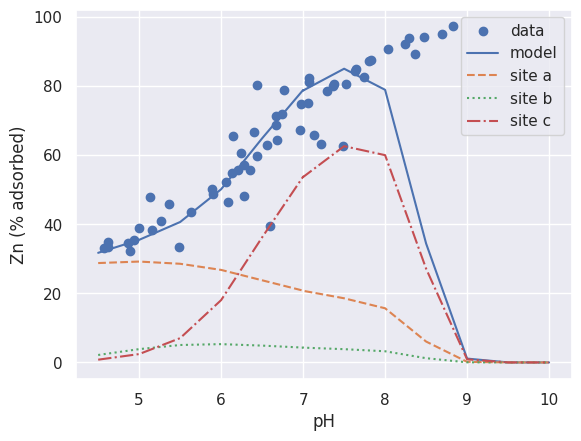

In [12]:
# I'll need to import a some modules for the plotting and downloading the plot.
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set_theme()

plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df2["pH"], df2["Znadsper"], label="data")
plt.plot(mod["pH"], modsper, label="model")
plt.plot(mod["pH"], sitea, label="site a", linestyle="--")
plt.plot(mod["pH"], siteb, label="site b", linestyle=":")
plt.plot(mod["pH"], sitec, label="site c", linestyle="-.")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_bact_mod.pdf")